In [1]:
import sinaps as sn

In [2]:
import numpy as np

In [3]:
np.pi

3.141592653589793

In [4]:
sec=list()
for i in range(2):
    sec.append(sn.Section(L=10,#100 μm (Migliore et al 2005) up to 600 μm
                       a=0.7,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV
    sec.append(sn.Section(L=100,#100 μm (Migliore et al 2005) up to 600 μm
                       a=1.5,#1 μm  (Migliore et al 2005) 0.3 to 5 μm (for oblique dend)
                       C_m=1,#10 mF/ m2 = 1 μF / cm2 (Migliore et al 2005) taum = 28 ms -> Cm = 1 μF/cm2
                       R_l=70, #(Migliore et al 2005) 150 Ω.cm
                       V0 = 0)) # mV

N=sn.Neuron()

N.add_section(sec[0],0,1)
N.add_section(sec[1],1,2)
N.add_section(sec[2],1,3)
N.add_section(sec[3],3,4)



In [5]:
N._x

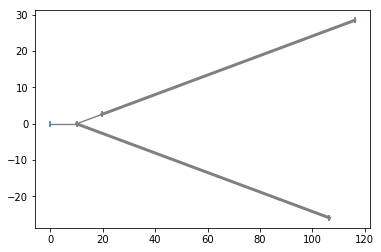

In [6]:
N.view.graph()

In [6]:
self=N

In [7]:
max([s['i'] for s in self.sections])

3

In [8]:
N.adj_mat

array([[None,
        Section(name=139931622018912, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm),
        None, None, None],
       [None, None,
        Section(name=139931622018968, L=1 mm, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm),
        None, None],
       [None, None, None,
        Section(name=139931622019024, L=10 um, a=700 nm, C_m=10 fF/μm², R_l=700 kΩ.μm),
        None],
       [None, None, None, None,
        Section(name=139931622027336, L=1 mm, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm)],
       [None, None, None, None, None]], dtype=object)

In [29]:
def _create_coordinate(self,
                      permut= np.random.permutation,
                      start_angle=0,
                      diff_angle=np.pi/6,
                     ):
        """create the nodes coordinate from tree structure for ploting the neuron"""
    
        n=self.nb_nodes
        self.x=[0]*n
        self.y=[0]*n

        def set_coordinate_from_node(i,angle_i):
            nb_children=np.count_nonzero(self.adj_mat[i])
            k=-(nb_children-1)/2.0
            for j in permut(n):
                if self.adj_mat[i,j]:
                    angle_j=angle_i+k*diff_angle
                    k=k+1
                    self.x[j]=self.x[i]+math.cos(angle_j)*self.adj_mat[i,j].L
                    self.y[j]=self.y[i]-math.sin(angle_j)*self.adj_mat[i,j].L
                    set_coordinate_from_node(j,angle_j)

        set_coordinate_from_node(0,start_angle)


In [13]:
self.adj_mat[i]

array([None, None,
       Section(name=139931622018968, L=1 mm, a=800 nm, C_m=10 fF/μm², R_l=700 kΩ.μm),
       None, None], dtype=object)

In [18]:
import math

In [15]:
np.count_nonzero(self.adj_mat[i])

1

In [45]:
_create_coordinate(N)

In [59]:
def plot(self):    
    plt.scatter(self.x, self.y, marker='|')
    for s in self.sections:
            plt.plot([self.x[s['i']],self.x[s['j']]],[self.y[s['i']],self.y[s['j']]],
                    linewidth=s['obj'].a*2,
                    color='grey')



In [22]:
import matplotlib.pyplot as plt

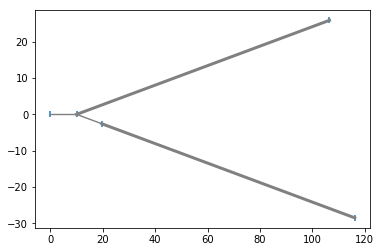

In [60]:
plot(N)

In [ ]:

        
    def _create_sections(self):
        """create neuron sections from geometry"""
        n=self.nb_nodes()
        self.sections=[h.Section(name="node_{}".format(self.node_names[i])) for i in xrange(n)]
        for parent,child in self.edges:
            self.sections[child].connect(self.sections[parent](1))
            
            
    def print_details(self):
        print "Node names :"
        print self.node_names
        print"=============="
        print "Edges :"
        print self.edges
        print"=============="

    def print_details_neuron(self):
        for i in xrange(self.nb_nodes()):
            checknode=self.sections[i]
            print 'Parent'
            print checknode.name()
            print 'Child'
            for c in checknode.children():
                print c.name()
        
    def plot(self,**kwargs):    
        pyplot.scatter(self.x, self.y, **kwargs)
        pyplot.show()


    def plot_edges(self):
        for e in self.edges:
            pyplot.plot([x[e[0]],x[e[1]]],[y[e[0]],y[e[1]]])
            self.plot()

In [5]:
import numpy as np
pi=np.pi

from scipy.integrate import odeint
from quantiphy import Quantity

In [7]:
S=list()
for i in range(3):
    S.append(Section(L=1E-4,
              a=1E-6,
              R_m=1,
              C_m=100E-6,
              R_l=1))

In [9]:
class Neuron:
    """This class represent a neuron
    N=Neuron(sections)
    structure is a dictionary with segments and connections:
    
    example : sections = {S0:[1,2],S1:[2,3],S2:[2,4]}
    S0, S1, S2 are Section type
    node 1 is connected to node 2 with S0 section
    node 2 is connected to node 3 with S1 section, and to node 4 with S2 section
    
    
    N=Neuron(nb_nodes)
    
    
    
    
    """
    
    def __init__(self, sections):

                     
        self.sections=sections
                
    def add_section(self,s,i,j):
        """Connect nodes
        
        example : N.add_section(i,j,s)
        With i and j:Int and s:Section
        connect nodes i and j with section s
        
        """
        self.sections[s]=[i,j]
    
    
    def adj_mat(self):
        n=max(max(sections.values()))+1
        self.mat = np.ndarray([n,n],Section)    
        for s,ind in sections.items():
            self.mat[ind[0],ind[1]]=s
    
    
    def create_segments(res):
        """
        N.create_segments(res = spatial_resolution [m])
    
        """
        for s in self.sections:
            pass
            
        
        
        
    def conductance_mat(res):
        """Return conductance matrix of the neuron
        
        N.conductance_mat(res = spatial_resolution [m])
        
        
        """
        
        
        
        

In [170]:
a=np.ndarray([3,3],Segment)

In [10]:
N=Neuron({S[0]:[0,1],S[1]:[1,2],S[2]:[1,3]})

In [199]:
N.add_section(S[1],1,2)

In [174]:
a={S[0]:[0,1],S[1]:[1,2],S[2]:[1,3]}

In [183]:
max(max(a.values()))

3

In [11]:
N.sections

{Section(name=2545392076728, L=100 um, a=1 um, R_m=1 Ω.m², R_l=1 Ω.m, C_m=100 uF/m²): [1,
  3],
 Section(name=2545392078464, L=100 um, a=1 um, R_m=1 Ω.m², R_l=1 Ω.m, C_m=100 uF/m²): [1,
  2],
 Section(name=2545392078800, L=100 um, a=1 um, R_m=1 Ω.m², R_l=1 Ω.m, C_m=100 uF/m²): [0,
  1]}

In [ ]:
class Simulation:
    """This class represent a simulation"""
    
    

In [150]:
b={1:4,5:6}
for a,c in b.items():
    print(str(a)+str(c))

14
56


In [4]:
!pip3 install quantiphy

  Cache entry deserialization failed, entry ignored
